## ANÁLISIS EXPLORATORIO DE DATOS (EDA):

### ¿España como potencia en renovables?
- ¿Progresión de las renovables en España en los últimos años? Hipótesis a contrastar: previsiblemente hay un aumento
- ¿Superficie y clima suficiente y favorable para su crecimiento? 
- ¿Con respecto a Europa? en función del PIB 
- ¿A nivel global?
- ¿Cuál es la renovable más explotada y cúal la más explotable a priori?


In [289]:
# Librery 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px

In [290]:
# Read all csv 

preroot= '/Users/mcgg/Documents/TheBridge_DataScience_py_local/02_DATA_ANALISIS/EDA/EDA-energia'

df_world=pd.read_csv(preroot+'/energy-data/data/world_energy_data.csv')
df_spn=pd.read_csv(preroot+'/energy-data/data/spn_energy_data.csv')
df_wheather_spn=pd.read_csv(preroot+'/energy-data/data/spn_weather_features.csv')

### *Extracción inicial info. de los CSVs*

In [291]:
print('* Datos globales: *')
df_world.info()
df_world.describe()


* Datos globales: *
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17239 entries, 0 to 17238
Columns: 128 entries, iso_code to wind_energy_per_capita
dtypes: float64(125), int64(1), object(2)
memory usage: 16.8+ MB


,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,...,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
count,17239.000000,7152.000000,13589.000000,5.074000e+03,9491.000000,6474.000000,10106.000000,9983.000000,10135.000000,4936.000000,...,4835.000000,7112.000000,4367.000000,6067.000000,1820.000000,4835.000000,4743.000000,4835.000000,7112.000000,4367.000000
mean,1973.609722,23.968662,9.621462,1.841334e+14,14.152412,20.067887,15.282424,4.224858,42.962626,2.094248,...,7.969383,13.952362,36.392106,1.223524,209.910982,0.371352,3.257272,23.392614,53.206260,149.732919
std,34.727666,725.148859,149.031801,1.311620e+16,92.682368,354.470689,176.113214,26.573195,316.803222,5.604580,...,72.336142,60.524479,150.525206,4.396865,5707.382457,1.421771,21.193715,165.083532,239.279519,559.841069
min,1900.000000,-100.000000,-2366.470000,-1.000000e+02,-1225.490000,-100.000000,-3638.516000,-95.005000,-6910.324000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,-10.409000,0.000000,0.000000,0.000000
25%,1946.000000,-5.226250,0.000000,-1.382250e+00,0.000000,-3.816750,0.000000,-0.670000,-0.065000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.481000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1983.000000,2.030000,0.000000,3.718500e+00,0.000000,1.300000,0.000000,2.341000,0.445000,0.019000,...,0.000000,0.000000,0.000000,0.000000,19.732000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2002.000000,9.994500,0.163000,1.152850e+01,1.333000,10.692750,1.384000,6.713000,8.435000,1.595500,...,0.017000,0.000000,0.432000,0.108500,50.064000,0.022000,0.019000,0.191500,0.555000,5.816500
max,2021.000000,44965.754000,3057.952000,9.342930e+17,2093.606000,25500.000000,2795.152000,1458.505000,6502.243000,72.881000,...,2111.177000,1129.198000,2306.786000,56.840000,242329.182000,24.601000,430.975000,3925.718000,3588.088000,6965.521000


In [292]:
print('* Datos energía España: *')
df_spn.info()

* Datos energía España: *
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        3

In [293]:
print('* Datos clima España: *')
df_wheather_spn.info()

* Datos clima España: *
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object

### LIMPIEZA DE DATOS: 


#### csv global

```df_world```: DataFrame que contiene los datos de energía a nivel global recogidos desde el año 1900-2021.

Se distingue entre los siguientes conjuntos:

- Producción
- Consumo


|column	|description	|source|
|-------|---------------|------|
|iso_code|	ISO 3166-1 alpha-3 three-letter country codes|	International Organization for Standardization|
|country|	Geographic location|	Our World in Data|
|year	|Year of observation	|Our World in Data|
|coal_prod_change_pct|	Annual percentage change in coal production	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Shift Data Portal|
|coal_prod_change_twh|	Annual change in coal production, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Shift Data Portal|
|gas_prod_change_pct	|Annual percentage change in gas production	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Shift Data Portal|
|gas_prod_change_twh|	Annual change in gas production, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Shift Data Portal|
|oil_prod_change_pct|	Annual percentage change in oil production	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Shift Data Portal|
|oil_prod_change_twh	|Annual change in oil production, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Shift Data Portal|
|energy_cons_change_pct	|Annual percentage change in primary energy consumption|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Shift Data Portal|
|energy_cons_change_twh	|Annual change in primary energy consumption, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Shift Data Portal|
|biofuel_share_elec|	Share of electricity generation that comes from biofuels	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|biofuel_cons_change_pct|	Annual percentage change in biofuel consumption	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|biofuel_share_energy	|Share of primary energy consumption that comes from biofuels	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|biofuel_cons_change_twh	|Annual change in biofuel consumption, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|biofuel_consumption	|Primary energy consumption from biofuels, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|biofuel_elec_per_capita	|Per capita electricity generation from biofuels, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|biofuel_cons_per_capita	|Per capita primary energy consumption from biofuels, measured in kilowatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and UN Population estimates|
|carbon_intensity_elec	|Carbon intensity of electricity production, measured in grams of carbon dioxide emitted per kilowatt-hour	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|coal_share_elec	|Share of electricity generation that comes from coal	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|coal_cons_change_pct	|Annual percentage change in coal consumption	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|coal_share_energy	|Share of primary energy consumption that comes from coal	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|coal_cons_change_twh	|Annual change in coal consumption, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
coal_consumption	|Primary energy consumption from coal, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy
|coal_elec_per_capita	|Per capita electricity generation from coal, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|coal_cons_per_capita	|Per capita primary energy consumption from coal, measured in kilowatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|coal_production	|Coal production, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Shift Data Portal|
|coal_prod_per_capita	|Per capita coal production, measured in kilowatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
|electricity_demand	|Electricity demand, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|electricity_generation	|Electricity generation, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|greenhouse_gas_emissions|	Greenhouse-gas emissions produced in the generation of electricity, measured in million tonnes of CO2 equivalent	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|biofuel_electricity	|Electricity generation from biofuels, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|coal_electricity	|Electricity generation from coal, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|fossil_electricity|	Electricity generation from fossil fuels, measured in terawatt-hours. This is the sum of electricity generation from coal, oil and gas.	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|gas_electricity|	Electricity generation from gas, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|hydro_electricity|	Electricity generation from hydropower, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|nuclear_electricity	|Electricity generation from nuclear power, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|oil_electricity	|Electricity generation from oil, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|other_renewable_electricity	|Electricity generation from other renewable sources including biofuels, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|other_renewable_exc_biofuel_electricity|	Electricity generation from other renewable sources excluding biofuels, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|renewables_electricity|	Electricity generation from renewables, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|solar_electricity|	Electricity generation from solar, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|wind_electricity	|Electricity generation from wind, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|energy_per_gdp|	Energy consumption per unit of GDP. This is measured in kilowatt-hours per 2011 international-$.|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Shift Data Portal and Maddison Project Database|
|energy_per_capita	|Primary energy consumption per capita, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Shift Data Portal and UN Population estimates|
|fossil_cons_change_pct|	Annual percentage change in fossil fuel consumption|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|fossil_share_energy	|Share of primary energy consumption that comes from fossil fuels|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|fossil_cons_change_twh	|Annual change in fossil fuel consumption, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|fossil_fuel_consumption|	Fossil fuel consumption, measured in terawatt-hours. This is the sum of primary energy from coal, oil and gas.|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|fossil_energy_per_capita|	Per capita fossil fuel consumption, measured in kilowatt-hours. This is the sum of primary energy from coal, oil and gas.|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
|fossil_cons_per_capita	|Per capita fossil fuel consumption, measured in kilowatt-hours. This is the sum of primary energy from coal, oil and gas.	|Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
|fossil_share_elec	|Share of electricity generation that comes from fossil fuels (coal, oil and gas combined)	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|gas_share_elec|	Share of electricity generation that comes from gas|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|gas_cons_change_pct	|Annual percentage change in gas consumption|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|gas_share_energy|	Share of primary energy consumption that comes from gas|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|gas_cons_change_twh	|Annual change in gas consumption, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|gas_consumption	|Primary energy consumption from gas, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|gas_elec_per_capita	|Per capita electricity generation from gas, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Ember; and UN Population Estimates|
|gas_energy_per_capita|	Per capita primary energy consumption from gas, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
|gas_production	|Gas production, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Shift Data Portal|
|gas_prod_per_capita	|Per capita gas production, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
|hydro_share_elec|	Share of electricity generation that comes from hydropower	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|hydro_cons_change_pct	|Annual percentage change in hydropower consumption|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|hydro_share_energy	|Share of primary energy consumption that comes from hydropower|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|hydro_cons_change_twh	|Annual change in hydropower consumption, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|hydro_consumption	|Primary energy consumption from hydropower, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|hydro_elec_per_capita	|Per capita electricity generation from hydropower, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Ember; and UN Population Estimates|
|hydro_energy_per_capita	|Per capita primary energy consumption from hydropower, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
|low_carbon_share_elec	|Share of electricity generation that comes from low-carbon sources. This is the sum of electricity from renewables and nuclear|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|low_carbon_electricity	|Electricity generation from low-carbon sources, measured in terawatt-hours. This is the sum of electricity generation from renewables and nuclear power	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|low_carbon_elec_per_capita|	Per capita electricity generation from low-carbon sources, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Ember; and UN Population Estimates|
|low_carbon_cons_change_pct|	Annual percentage change in low-carbon energy consumption	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|low_carbon_share_energy	|Share of primary energy consumption that comes from low-carbon sources. This is the sum of primary energy from renewables and nuclear|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|low_carbon_cons_change_twh	|Annual change in low-carbon energy consumption, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|low_carbon_consumption	|Primary energy consumption from low-carbon sources, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|low_carbon_energy_per_capita	|Per capita primary energy consumption from low-carbon sources, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
net_elec_imports	|Net electricity imports, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|net_elec_imports_share_demand|	Net electricity imports as a share of electricity demand|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|nuclear_share_elec	|Share of electricity generation that comes from nuclear power	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|nuclear_cons_change_pct	|Annual percentage change in nuclear consumption|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|nuclear_share_energy	|Share of primary energy consumption that comes from nuclear power|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|nuclear_cons_change_twh	|Annual change in nuclear consumption, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|nuclear_consumption	|Primary energy consumption from nuclear power, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|nuclear_elec_per_capita	|Per capita electricity generation from nuclear power, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Ember; and UN Population Estimates|
|nuclear_energy_per_capita	|Per capita primary energy consumption from nuclear, measured in kilowatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
|oil_share_elec|	Share of electricity generation that comes from oil|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|oil_cons_change_pct	|Annual percentage change in oil consumption	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|oil_share_energy|	Share of primary energy consumption that comes from oil|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|oil_cons_change_twh	|Annual change in oil consumption, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|oil_consumption|	Primary energy consumption from oil, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|oil_elec_per_capita	|Per capita electricity generation from oil, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|oil_energy_per_capita	|Per capita primary energy consumption from oil, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
|oil_production	|Oil production, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Shift Data Portal|
|oil_prod_per_capita|	Per capita oil production, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
|other_renewables_elec_per_capita	|Per capita electricity generation from other renewables including biofuels, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Ember; and UN Population Estimates|
|other_renewables_elec_per_capita_exc_biofuel|	Per capita electricity generation from other renewables excluding biofuels, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Ember; and UN Population Estimates|
|other_renewables_share_elec|	Share of electricity generation that comes from other renewables including biofuels|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|other_renewables_share_elec_exc_biofuel	|Share of electricity generation that comes from other renewables excluding biofuels|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|other_renewables_cons_change_pct|	Annual percentage change in energy consumption from other renewables	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|other_renewables_share_energy	|Share of primary energy consumption that comes from other renewables|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|other_renewables_cons_change_twh	|Annual change in other renewable consumption, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|other_renewable_consumption	|Primary energy consumption from other renewables, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|other_renewables_energy_per_capita	|Per capita primary energy consumption from other renewables, measured in kilowatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
|per_capita_electricity|	Electricity generation per capita, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Ember; and UN Population Estimates|
|population|	Total population|	Gapminder and UN Population estimates|
|primary_energy_consumption|	Primary energy consumption, measured in terawatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|renewables_elec_per_capita|	Per capita electricity generation from renewables, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
|renewables_share_elec|	Share of electricity generation that comes from renewables	|Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|renewables_cons_change_pct	|Annual percentage change in renewable energy consumption	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|renewables_share_energy	|Share of primary energy consumption that comes from renewables|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|renewables_cons_change_twh	|Annual change in renewable energy consumption, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|renewables_consumption	|Primary energy consumption from renewables, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|renewables_energy_per_capita	|Per capita primary energy consumption from renewables, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Ember; and UN Population Estimates|
|solar_share_elec	|Share of electricity generation that comes from solar|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|solar_cons_change_pct	|Annual percentage change in solar consumption	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|solar_share_energy|	Share of primary energy consumption that comes from solar	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|solar_cons_change_twh	|Annual change in solar consumption, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|solar_consumption	|Primary energy consumption from solar, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|solar_elec_per_capita	|Per capita electricity generation from solar, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Ember; and UN Population Estimates|
|solar_energy_per_capita	|Per capita primary energy consumption from solar, measured in kilowatt-hours	|Calculated by Our World in Data based on BP Statistical Review of World Energy; Gapminder and UN Population Estimates|
|gdp	|Total real gross domestic product, inflation-adjusted	|Maddison Project Database|
|wind_share_elec	|Share of electricity generation that comes from wind|	Calculated by Our World in Data based on BP Statistical Review of World Energy and Ember|
|wind_cons_change_pct	|Annual percentage change in wind consumption	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|wind_share_energy	|Share of primary energy consumption that comes from wind	|Calculated by Our World in Data based on BP Statistical Review of World Energy|
|wind_cons_change_twh	|Annual change in wind consumption, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|wind_consumption	|Primary energy consumption from wind, measured in terawatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy|
|wind_elec_per_capita	|Per capita electricity generation from wind, measured in kilowatt-hours|	Calculated by Our World in Data based on BP Statistical Review of World Energy; Ember; and UN Population Estimates|
|wind_energy_per_capita	|Per capita primary energy consumption from wind, measured in kilowatt-hours|

In [294]:
# Se comprueba los años de los cuales tenemos datos 
df_world.year.unique()

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021])

In [295]:
print('Número de paises+continentes tenidos en cuenta:',len(df_world.country.unique()))
df_world.country.unique()

Número de paises+continentes tenidos en cuenta: 241


array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia Pacific', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'CIS', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Czechoslovakia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'East Germany', 'Eastern Africa', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea'

In [296]:
columnas=df_world.columns.to_list()
columnas

['iso_code',
 'country',
 'year',
 'coal_prod_change_pct',
 'coal_prod_change_twh',
 'gas_prod_change_pct',
 'gas_prod_change_twh',
 'oil_prod_change_pct',
 'oil_prod_change_twh',
 'energy_cons_change_pct',
 'energy_cons_change_twh',
 'biofuel_share_elec',
 'biofuel_elec_per_capita',
 'biofuel_cons_change_pct',
 'biofuel_share_energy',
 'biofuel_cons_change_twh',
 'biofuel_consumption',
 'biofuel_cons_per_capita',
 'carbon_intensity_elec',
 'coal_share_elec',
 'coal_cons_change_pct',
 'coal_share_energy',
 'coal_cons_change_twh',
 'coal_consumption',
 'coal_elec_per_capita',
 'coal_cons_per_capita',
 'coal_production',
 'coal_prod_per_capita',
 'electricity_demand',
 'biofuel_electricity',
 'coal_electricity',
 'fossil_electricity',
 'gas_electricity',
 'hydro_electricity',
 'nuclear_electricity',
 'oil_electricity',
 'other_renewable_exc_biofuel_electricity',
 'other_renewable_electricity',
 'renewables_electricity',
 'solar_electricity',
 'wind_electricity',
 'electricity_generation'

**Agrupación de df_global por paises:**

In [297]:
# Porcentaje de datos de España con respecto al global:

(df_world.country[df_world.country=='Spain'].count()/len(df_world.country))*100

0.7076976622773943

In [298]:
col_pct=[i for i in df_world.columns if i[-3::] =='pct']
col_pct

['coal_prod_change_pct',
 'gas_prod_change_pct',
 'oil_prod_change_pct',
 'energy_cons_change_pct',
 'biofuel_cons_change_pct',
 'coal_cons_change_pct',
 'fossil_cons_change_pct',
 'gas_cons_change_pct',
 'hydro_cons_change_pct',
 'low_carbon_cons_change_pct',
 'nuclear_cons_change_pct',
 'oil_cons_change_pct',
 'other_renewables_cons_change_pct',
 'renewables_cons_change_pct',
 'solar_cons_change_pct',
 'wind_cons_change_pct']

In [299]:
df_global_pct1=df_world.loc[:,col_pct]
df_global_pct1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17239 entries, 0 to 17238
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   coal_prod_change_pct              7152 non-null   float64
 1   gas_prod_change_pct               5074 non-null   float64
 2   oil_prod_change_pct               6474 non-null   float64
 3   energy_cons_change_pct            9983 non-null   float64
 4   biofuel_cons_change_pct           679 non-null    float64
 5   coal_cons_change_pct              4334 non-null   float64
 6   fossil_cons_change_pct            4779 non-null   float64
 7   gas_cons_change_pct               4278 non-null   float64
 8   hydro_cons_change_pct             4229 non-null   float64
 9   low_carbon_cons_change_pct        4413 non-null   float64
 10  nuclear_cons_change_pct           1840 non-null   float64
 11  oil_cons_change_pct               4779 non-null   float64
 12  othe

In [300]:
dic_index_country=df_world.groupby('iso_code').groups
dic_index_country


{'ABW': [879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913], 'AFG': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], 'AGO': [525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605

In [301]:
df_world.gdp[df_world.year==2018]

118      6.759497e+10
239               NaN
360      3.400911e+10
481      5.903175e+11
522               NaN
             ...     
16730             NaN
16850    1.136302e+14
16902    6.904273e+10
17115    6.097862e+10
17236    2.271535e+10
Name: gdp, Length: 235, dtype: float64

In [302]:
df_world[df_world.year==2018].gdp

118      6.759497e+10
239               NaN
360      3.400911e+10
481      5.903175e+11
522               NaN
             ...     
16730             NaN
16850    1.136302e+14
16902    6.904273e+10
17115    6.097862e+10
17236    2.271535e+10
Name: gdp, Length: 235, dtype: float64

In [303]:
#[pais for pais in df_world.country.unique()if df_world.gdp[(df_world.country==pais)&(df_world.year==2018)]>df_world.gdp[(df_world.country=='Spain')&(df_world.year==2018)]]

In [304]:
#[df_world[df_world.gdp[(df_world.country==pais)&(df_world.year==2018)]>=df_world.gdp[(df_world.country=='Spain')&(df_world.year==2018)]]for pais in df_world.country]

In [305]:
#df_world.gdp[df_world.country=='Spain']
#df_world[df_world['gdp']>=df_world.gdp[df_world.country=='Spain']]

In [306]:
#for key in dic_index_country.keys:

In [307]:
# Eliminamos las filas que tengan NaN completamente
df=df_global_pct1.dropna(how='any')
df=df.dropna(axis=1,how='all')

print(df.shape)

df=df_global_pct1.dropna(how='all')
df=df.dropna(axis=1,how='all')

print(df.shape)


(383, 16)
(14171, 16)


In [308]:
df_global_pct=df_world.loc[:,col_pct+['iso_code']]
df=df_global_pct.dropna(how='all')
df=df.dropna(axis=1,how='all')

print(df.shape)
print(df.iso_code.unique())
dic_index_country_pct=df_global_pct.groupby('iso_code').groups

print('Número de únicos:',len(df_global_pct.iso_code.unique()))
df_global_pct.iso_code.unique()

(17106, 17)
['AFG' 'OWID_AFR' 'ALB' 'DZA' 'ASM' 'AGO' nan 'ATG' 'ARG' 'ARM' 'ABW'
 'AUS' 'AUT' 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU'
 'BTN' 'BOL' 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'KHM' 'CMR'
 'CAN' 'CPV' 'CYM' 'CAF' 'TCD' 'CHL' 'CHN' 'COL' 'COM' 'COG' 'COK' 'CRI'
 'CIV' 'HRV' 'CUB' 'CYP' 'CZE' 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY'
 'SLV' 'GNQ' 'ERI' 'EST' 'SWZ' 'ETH' 'OWID_EUR' 'OWID_EU27' 'FRO' 'FLK'
 'FJI' 'FIN' 'FRA' 'GUF' 'PYF' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GRC' 'GRL'
 'GRD' 'GLP' 'GUM' 'GTM' 'GIN' 'GNB' 'GUY' 'HTI' 'HND' 'HKG' 'HUN' 'ISL'
 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN'
 'KIR' 'OWID_KOS' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LTU'
 'LUX' 'MAC' 'MDG' 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MTQ' 'MRT' 'MUS' 'MEX'
 'FSM' 'MDA' 'MNG' 'MNE' 'MSR' 'MAR' 'MOZ' 'MMR' 'NAM' 'NRU' 'NPL' 'NLD'
 'ANT' 'NCL' 'NZL' 'NIC' 'NER' 'NGA' 'NIU' 'PRK' 'MKD' 'MNP' 'NOR' 'OMN'
 'PAK' 'PSE' 'PAN' 'PNG' 'PRY' 'PER' 'PHL' '

array(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'ASM', 'AGO', nan, 'ATG', 'ARG',
       'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB',
       'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN',
       'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG',
       'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'COD', 'DNK',
       'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST',
       'SWZ', 'ETH', 'OWID_EUR', 'OWID_EU27', 'FRO', 'FLK', 'FJI', 'FIN',
       'FRA', 'GUF', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC',
       'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI',
       'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL',
       'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS',
       'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LTU',
       'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MTQ',
       '

In [309]:
df[df.iso_code=='ALB']

,coal_prod_change_pct,gas_prod_change_pct,oil_prod_change_pct,energy_cons_change_pct,biofuel_cons_change_pct,coal_cons_change_pct,fossil_cons_change_pct,gas_cons_change_pct,hydro_cons_change_pct,low_carbon_cons_change_pct,nuclear_cons_change_pct,oil_cons_change_pct,other_renewables_cons_change_pct,renewables_cons_change_pct,solar_cons_change_pct,wind_cons_change_pct,iso_code
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALB
243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALB
244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALB
245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALB
246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,NaN,28.57,13.14,11.445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALB
359,NaN,NaN,NaN,-3.282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALB
360,NaN,NaN,NaN,13.428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALB
361,NaN,NaN,NaN,-22.110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALB


In [310]:

# Pie chart

#### csv España

```df_spn```: DataFrame que contiene los datos de energía en españa recogidos desde el año 2015 hasta 31 dic 2018

|column	|description	|
|-------|---------------|
|time||
|generation biomass||
|generation fossil brown coal/lignite||
|generation fossil bcoal-derived gas||
|generation fossil gas||
|generation fossil hard coal||
|generation fossil oil||
|generation fossil oil shale||
|generation fossil peat||
|generation geothermal||
|generation hydro pumped storage aggregated||
|generation hydro pumped storage consumption||
|generation hydro run-of-river and poundage||
|generation hydro water reservoir||
|generation marine||
|generation nuclear||
|generation other||
|generation other renewable||
|generation solar||
|generation waste||
|generation wind offshore||
|generation wind onshore||
|forecast solar day ahead||
|forecast wind offshore eday ahead||
|forecast wind onshore day ahead||
|total load forecast||
|total load actual||
|price day ahead||
|price actual||
|time_dt||


In [311]:
df_spn.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [312]:
df_spn.tail()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89
35063,2018-12-31 23:00:00+01:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88


In [313]:
# Se reemplaza 'time' quitándole el intervalo
df_spn['time']=df_spn['time'].replace({'\+01:00|\+02:00|\+03:00':''},regex=True)

In [314]:
# Se crea una columna tipo datatime llamada 'time_dt' equivale al str de 'time' 

x=[]
[x.append(dt.datetime.strptime(t,'%Y-%m-%d %H:%M:%S')) for t in df_spn['time']]
df_spn['time_dt']=x
df_spn.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,time_dt
0,2015-01-01 00:00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,2015-01-01 00:00:00
1,2015-01-01 01:00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92,2015-01-01 01:00:00
2,2015-01-01 02:00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48,2015-01-01 02:00:00
3,2015-01-01 03:00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32,2015-01-01 03:00:00
4,2015-01-01 04:00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04,2015-01-01 04:00:00


In [315]:
df_spn.shape

(35064, 30)

In [316]:
# Comprobamos si existe alguna fila o columna completamente llena de NaN
df=df_spn.copy()
df=df.drop(columns=['time','time_dt'])
df=df.dropna(how='all')
df.dropna(axis=1,how='all',inplace=True)
# Se comprueba si no hay ninguna columna ni fila que se elimine
print('Se mantienen las mismas filas y columnas:',df.shape[0]==df_spn.shape[0],'y',df.shape[1]+2==df_spn.shape[1])
print('Número fil y col antes',df_spn.shape,'Número fil y col después',df.shape)
df.isna().sum()

Se mantienen las mismas filas y columnas: True y False
Número fil y col antes (35064, 30) Número fil y col después (35064, 26)


generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil coal-derived gas             18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation fossil oil shale                    18
generation fossil peat                         18
generation geothermal                          18
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation marine                              19
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind offshore                       18
generation wind onshore                        18


##### **Funciones**

In [317]:
def comp_colna_filna(df_pcp,col):
    '''
    Objetivo: realizar una comprobación las columnas y filas del df para ver si tienen alguna completamente llena de NaN.
                En este caso simplemente nos lo informa pero no realiza ningún cambio en el dataset original.

    args.
    -----
    df_pcp: pd.DataFrame; es el dataset/dataframe principal, que vamos a comparar con el que evalúa si hay nan en filas y columnas.
    col: lista de str; lista de las columnas que quieras eliminar previamente.

    ret.
    ----
    No hay return, simplemente printea la respuesta.
    '''
    # Comprobamos si existe alguna fila o columna completamente llena de NaN
    df=df_pcp.copy()
    df=df.drop(columns=col)
    df=df.dropna(how='all')
    df=df.dropna(axis=1,how='all')
    # Se comprueba si no hay ninguna columna ni fila que se elimine
    print('Se mantienen las mismas filas y columnas:',df.shape[0]==df_spn.shape[0],'y',df.shape[1]+len(col)==df_spn.shape[1])
    print('Número fil y col antes',df_pcp.shape,'Número fil y col después',df.shape)


def del_colna_filna(df,col=-1):
    '''
    Objetivo: realizar una comprobación las columnas y filas del df para ver si tienen alguna completamente llena de NaN y en tal caso las elimina. 

    args.
    -----
    df: pd.DataFrame; es el dataset/dataframe principal, que vamos a comparar con el que evalúa si hay nan en filas y columnas.
    col: lista de str; lista de las columnas que quieras eliminar previamente. (opcional)

    ret.
    ----
    df: dataset/dataframe actualizado.
    '''
    # Comprobamos si existe alguna fila o columna completamente llena de NaN y en tal caso la eliminamos del df
    if col!=-1:
        df_aux=df.loc[:,col]
        df=df.drop(columns=col)
    df.dropna(how='all',inplace=True)
    df.dropna(axis=1,how='all',inplace=True)
    return df_aux.join(df)

In [318]:
df=df_spn.copy()
print(df.shape)
col=['time','time_dt']

if col!=-1:
    df_aux=df.loc[:,col]
    df=df.drop(columns=col)
    print(df.columns)
df.dropna(how='all',inplace=True)
df.dropna(axis=1,how='all',inplace=True)
df.join(df_aux)

(35064, 30)
Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')


,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,...,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,time,time_dt
0,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,863.0,...,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,2015-01-01 00:00:00,2015-01-01 00:00:00
1,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,920.0,...,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92,2015-01-01 01:00:00,2015-01-01 01:00:00
2,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,1164.0,...,0.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48,2015-01-01 02:00:00,2015-01-01 02:00:00
3,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,1503.0,...,0.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32,2015-01-01 03:00:00,2015-01-01 03:00:00
4,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,1826.0,...,0.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04,2015-01-01 04:00:00,2015-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,1.0,...,0.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02,2018-12-31 19:00:00,2018-12-31 19:00:00
35060,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,1.0,...,0.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16,2018-12-31 20:00:00,2018-12-31 20:00:00
35061,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,50.0,...,0.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30,2018-12-31 21:00:00,2018-12-31 21:00:00
35062,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,108.0,...,0.0,3586.0,29.0,3273.0,25450.0,25801.0,63.93,69.89,2018-12-31 22:00:00,2018-12-31 22:00:00


In [319]:
df_spn.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'time_dt'],
      dtype='object')

In [320]:
df_spn=del_colna_filna(df_spn,['time','time_dt'])

In [321]:
df_spn.isna().sum()

# Se eliminan las columnas de nan y después filas completar con la media anterior siguiente o anterior /siguiente

time                                            0
time_dt                                         0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil coal-derived gas             18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation fossil oil shale                    18
generation fossil peat                         18
generation geothermal                          18
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation marine                              19
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19


In [322]:
df_spn.fillna(method='ffill',inplace=True)
df_spn.isna().sum()

time                                           0
time_dt                                        0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offs

In [323]:
df_spn.isna().sum()

time                                           0
time_dt                                        0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offs

In [324]:
df_spn

,time,time_dt,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00,2015-01-01 00:00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,...,49.0,196.0,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00,2015-01-01 01:00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,...,50.0,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00,2015-01-01 02:00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,...,50.0,196.0,0.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00,2015-01-01 03:00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,...,50.0,191.0,0.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00,2015-01-01 04:00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,...,42.0,189.0,0.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00,2018-12-31 19:00:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,...,85.0,277.0,0.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00,2018-12-31 20:00:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,...,33.0,280.0,0.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00,2018-12-31 21:00:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,...,31.0,286.0,0.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00,2018-12-31 22:00:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,...,31.0,287.0,0.0,3586.0,29.0,3273.0,25450.0,25801.0,63.93,69.89


In [325]:
df_spn.axes

[RangeIndex(start=0, stop=35064, step=1),
 Index(['time', 'time_dt', 'generation biomass',
        'generation fossil brown coal/lignite',
        'generation fossil coal-derived gas', 'generation fossil gas',
        'generation fossil hard coal', 'generation fossil oil',
        'generation fossil oil shale', 'generation fossil peat',
        'generation geothermal', 'generation hydro pumped storage consumption',
        'generation hydro run-of-river and poundage',
        'generation hydro water reservoir', 'generation marine',
        'generation nuclear', 'generation other', 'generation other renewable',
        'generation solar', 'generation waste', 'generation wind offshore',
        'generation wind onshore', 'forecast solar day ahead',
        'forecast wind onshore day ahead', 'total load forecast',
        'total load actual', 'price day ahead', 'price actual'],
       dtype='object')]

In [326]:
df_spn=df_spn.loc[:,df_spn.columns.str.startswith('generation')+df_spn.columns.str.startswith('time')]
[df_spn.drop(columns=col,inplace=True) for col in df_spn.columns if (df_spn[col]==0).sum()==len(df_spn)]
df_spn

/var/folders/p2/3cl0mklj57l85sps3wtpny_w0000gn/T/ipykernel_99072/556361985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  [df_spn.drop(columns=col,inplace=True) for col in df_spn.columns if (df_spn[col]==0).sum()==len(df_spn)]
/var/folders/p2/3cl0mklj57l85sps3wtpny_w0000gn/T/ipykernel_99072/556361985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  [df_spn.drop(columns=col,inplace=True) for col in df_spn.columns if (df_spn[col]==0).sum()==len(df_spn)]
/var/folders/p2/3cl0mklj57l85sps3wtpny_w0000gn/T/ipykernel_99072/556361985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,time,time_dt,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore
0,2015-01-01 00:00:00,2015-01-01 00:00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0
1,2015-01-01 01:00:00,2015-01-01 01:00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0
2,2015-01-01 02:00:00,2015-01-01 02:00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0
3,2015-01-01 03:00:00,2015-01-01 03:00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0
4,2015-01-01 04:00:00,2015-01-01 04:00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00,2018-12-31 19:00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0
35060,2018-12-31 20:00:00,2018-12-31 20:00:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0
35061,2018-12-31 21:00:00,2018-12-31 21:00:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0
35062,2018-12-31 22:00:00,2018-12-31 22:00:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,93.0,31.0,287.0,3586.0


-----------
Datos limpicos
-----------

*Agrupaciones:* 

In [328]:
df_spn_day=df_spn.copy()
df_spn_day['day']=df_spn_day['time'].replace({'| \d+\d+:\d+\d+:\d+\d+|':''},regex=True)
df_spn_year=df_spn_day.copy()

# Se crea una columna tipo datatime llamada 'day_dt' equivale al str de 'time' ('HACER FUNCION')
x=[]
[x.append(dt.datetime.strptime(t,'%Y-%m-%d')) for t in df_spn_year['day']]
df_spn_year['day_dt']=x

df_spn_month=df_spn_year.groupby(df_spn_year['day_dt'].dt.month).mean()
df_spn_year=df_spn_year.groupby(df_spn_year['day_dt'].dt.year).mean()

df_spn_day_2015=df_spn_day.loc[df_spn_day['day'].str.startswith('2015'),:]
df_spn_day_2016=df_spn_day.loc[df_spn_day['day'].str.startswith('2016'),:]
df_spn_day_2017=df_spn_day.loc[df_spn_day['day'].str.startswith('2017'),:]
df_spn_day_2018=df_spn_day.loc[df_spn_day['day'].str.startswith('2018'),:]

# Se agrupa por fecha: se realiza la media de todas las horas del día.
df_spn_day=df_spn_day.groupby('day').mean()


#### csv clima España

```df_wheather_spn```: DataFrame que contiene los datos del clima en españa recogidos desde el año 2015 hasta 31 dic 2018

|column	|description	|
|-------|---------------|
|dt_iso||
|city_name||
|temp||
|temp_min||
|temp_max||
|pressure||
|humidity||
|wind_speed||
|wind_deg||
|rain_1h||
|rain_3h||
|snow_3h||
|clouds_all||
|weather_id||
|weather_main||
|weather_description||
|weather_icon||


In [ ]:
df_wheather_spn.city_name.unique()

In [ ]:
df_wheather_spn.columns

In [ ]:

[df_wheather_spn[col].unique() for col in ['clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon']]

### Visualizaciones, primeros análisis.

In [ ]:
df_spn_day.corr()[df_spn_day.corr()>0.55]

In [ ]:
sns.heatmap(df_spn_day.corr(),annot=True);

<AxesSubplot:>

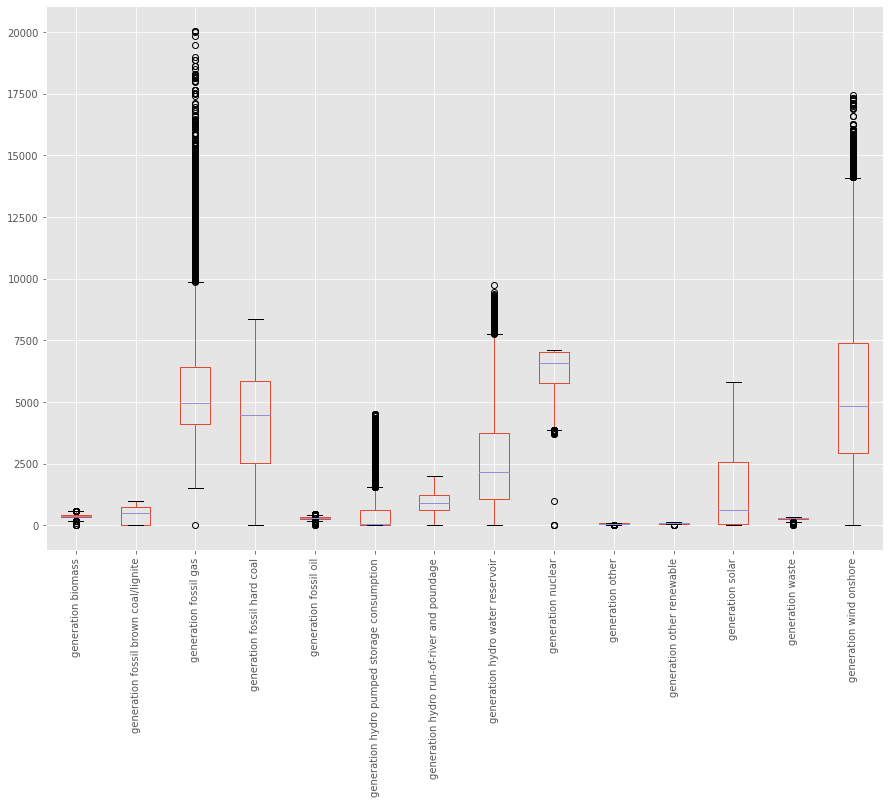

In [ ]:
df_spn_day.boxplot(rot='90',figsize=(15,10))

<AxesSubplot:>

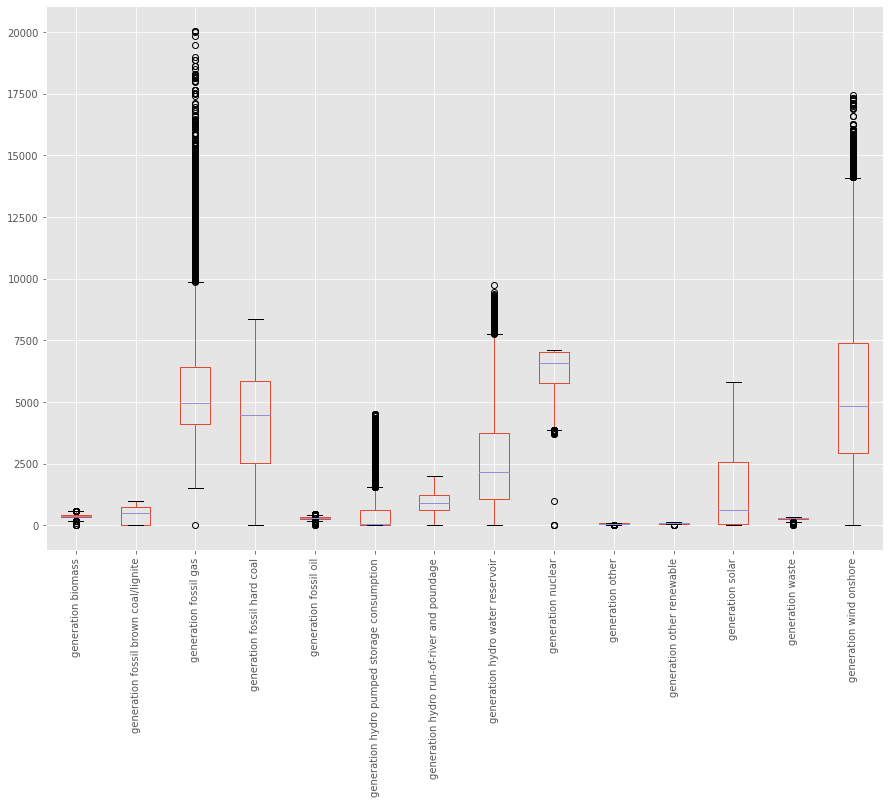

In [ ]:
df_spn_year.boxplot(rot='90',figsize=(15,10))

In [337]:
x1=df_spn_day_2015.loc[:,df_spn_day_2015.columns.str.startswith('generation')].sum()


In [344]:
len(x1)

14

In [351]:

pd.DataFrame(x1).rot

,0
generation biomass,4303811.0
generation fossil brown coal/lignite,4508958.0
generation fossil gas,44305532.0
generation fossil hard coal,46848266.0
generation fossil oil,2893585.0
generation hydro pumped storage consumption,4670238.0
generation hydro run-of-river and poundage,7659513.0
generation hydro water reservoir,22186613.0
generation nuclear,54726302.0
generation other,682580.0


ValueError: 'label' must be of length 'x'

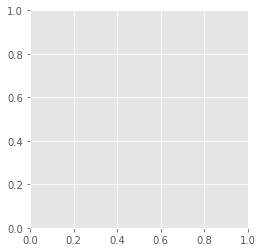

In [347]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df_spn_day_2015.columns.str.startswith('generation')
sizes = (x1/x1.sum())*100
explode = (0, 0.1,0,0,0,0,0,0,0,0,0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = x1
sizes = (x1/x1.sum())*100
explode = (0, 0.1,0,0,0,0,0,0,0,0,0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
df_spn_2.columns

In [ ]:
df_spn_2.drop(columns=['time','time_dt'])

In [ ]:
df_spn_rnw=df_spn_2.loc[:,['day','generation wind offshore',
       'generation wind onshore',
       'generation solar','generation geothermal', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine','generation other renewable']]

df_spn_nrnw=df_spn_2.loc[:,['day','generation biomass',
       'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat','generation nuclear', 'generation other','generation waste']]

In [ ]:
df_spn_rnw=df_spn_3.loc[:,['generation wind offshore',
       'generation wind onshore',
       'generation solar','generation geothermal', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine','generation other renewable']]

df_spn_nrnw=df_spn_3.loc[:,['generation biomass',
       'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat','generation nuclear', 'generation other','generation waste']]

In [ ]:
df_spn_2.boxplot(rot='90',figsize=(20,5))

In [ ]:
df_spn_2.boxplot(column='generation hydro pumped storage consumption',figsize=(20,5))

In [ ]:
(df_spn['generation hydro pumped storage consumption']==0).sum()

In [ ]:
plt.style.use('ggplot')

In [ ]:
df_spn_rnw.boxplot(rot='90',figsize=(15,10))

In [ ]:
df_spn_rnw.boxplot(rot='90',figsize=(15,10))

In [ ]:
sns.heatmap(df_spn_rnw.corr(),annot=True);

In [ ]:
sns.pairplot(df_spn_rnw.corr(),kind='kde',);